# _`expression`_`.multiply`

This function is overloaded, it supports these signatures:

- _`expression`_`.multiply(`_`exp`_`)`

  The product (i.e., the concatenation) of two expressions: `a.multiply(b)` => `ab`.

- _`expression`_`.multiply(`_`num`_`)`

  The repeated multiplication (concatenation) of an expression with itself: `a.multiply(3)` => `aaa`.  Exponent `-1` denotes the infinity: the Kleene star.

- _`expression`_`.multiply((`_`min`_`, `_`max`_`))`

  The sum of repeated multiplications of an expression: `a.multiply((2,4))` => `aa+aaa+aaaa`.  When `min = -1`, it  denotes `0`, when `max = -1`, it denotes the infinity.

Preconditions:
- _`min`_ ` <= ` _`max`_

See also:
- [automaton.multiply](automaton.multiply.ipynb)
- [polynomial.multiply](polynomial.multiply.ipynb)

## Examples

In [1]:
import vcsn
exp = vcsn.context('[...]* -> q').expression

### Simple Multiplication
Instead of `a.multiply(b)`, you may write `a * b`.

In [2]:
exp('a*b') * exp('ab*')

a*bab*

Of course, trivial identities are applied.

In [3]:
exp('<2>a') * exp('<3>\e')

<6>a

In [4]:
exp('<2>a') * exp('\z')

\z

In the case of word labels, adjacent words are not fused: concatenation of two expressions behaves as if the expressions were parenthetized.  Pay attention to the space between $a$ and $b$ below, admittedly too discreet.

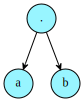

In [5]:
(exp('a') * exp('b')).SVG() # Two one-letter words

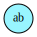

In [6]:
exp('ab').SVG() # One two-letter word

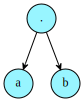

In [7]:
exp('(a)(b)').SVG() # Two one-letter words

### Repeated Multiplication
Instead of `a.multiply(3)`, you may write `a ** 3`.

In [8]:
exp('ab') ** 3

(ab){3}

In [9]:
exp('ab') ** 0

\e

Beware that `a * 3` actually denotes `a.rweight(3)`.

In [10]:
exp('a*') * 3

<3>a*

Use the exponent -1 to mean `infinity`.  Alternatively, you may invoke `a.star` instead of `a ** -1`.

In [11]:
exp('ab') ** -1

(ab)*

In [12]:
exp('ab').star()

(ab)*

### Sums of Repeated Multiplications
Instead of `a.multiply((2, 4))`, you may write `a ** (2, 4)`.  Again, use exponent -1 to mean infinity.

In [13]:
exp('ab') ** (2, 2)

(ab){2}

In [14]:
exp('ab') ** (2, 4)

(ab){2}(\e+ab+(ab){2})

In [15]:
exp('ab') ** (-1, 2)

\e+ab+(ab){2}

In [16]:
exp('ab') ** (2, -1)

(ab){2}(ab)*